## B cells in two subjects
The data used in this notebook is lymphocyte data for two patients' B cells. Here, we note presence/absense changes and quantify fold changes using a T test.


First, we import our loader module. This brings the functions defined there (in our repository at ~/load_data.py) into scope so we can use them in this script. Then we can load our data and store it as <code>data</code>.

Calling <code>head</code> shows the first several lines of the dataframe, which provides an idea of the type of data present and the structure of the dataframe.

In [1]:
import load_data
import pandas as pd
data_raw = load_data.load_FragPipe(version='July_noMBR_FP', contains=[])

data_raw

,Blank_3,Blank_4,Blank_5,Subject1_B_cells_062920_C_10,Subject1_B_cells_062920_C_11,Subject1_B_cells_062920_C_12,Subject1_B_cells_062920_C_13,Subject1_B_cells_062920_C_9,Subject1_B_cells_072920_C_4,Subject1_B_cells_072920_C_5,...,Subject2_T_cells_062920_F_12,Subject2_T_cells_062920_F_13,Subject2_T_cells_062920_F_14,Subject2_T_cells_062920_F_9,Subject2_T_cells_072920_F_1,Subject2_T_cells_072920_F_3,Subject2_T_cells_072920_F_4,Subject2_T_cells_072920_F_5,Subject2_T_cells_072920_F_6,Subject2_T_cells_072920_F_8
Protein ID,,,,,,,,,,,,,,,,,,,,,
A0A0B4J2D5,0.0,0.0,0.0,3203277.5,4697996.0,7346776.5,8472867.0,4280919.5,0.0,4787781.50,...,0.0,4905873.00,0.0,3405266.0,4656720.00,1673629.9,6060600.5,2407679.5,7791855.0,5542659.50
A0AVT1,0.0,0.0,0.0,1917388.2,3033529.2,3773018.8,1865758.6,5191332.5,3332031.5,2464089.00,...,1091121.4,630647.25,576871.9,0.0,0.00,0.0,0.0,827356.1,1260652.0,0.00
A0FGR8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,1514363.4,866311.94,0.0,0.0,0.00,0.0,0.0,0.0,653698.6,879074.56
A6NHR9,0.0,0.0,0.0,2650513.5,0.0,3788095.8,0.0,0.0,1845555.5,933499.44,...,0.0,0.00,0.0,0.0,430484.97,0.0,0.0,0.0,538303.6,948190.40
A8K2U0,0.0,0.0,0.0,0.0,0.0,0.0,1149867.8,0.0,0.0,0.00,...,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
O15068,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00
Q14C86,0.0,0.0,0.0,0.0,0.0,1139333.0,0.0,0.0,0.0,0.00,...,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,1029046.4,0.00
Q8N4T8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00


These are some methods that check if a value was measured or not and if the protein was measured in each type.

In [2]:
import data_utils
from numpy import nan
from numpy import log2
from statistics import median, mean

Here we record which proteins are only identified in one cell type. We'll set these aside for now, in the <code>data_in_one_type</code> dataframe. Note that <code>min_reps</code> is the minimum number of replicates required to list a protein as present in one type. This can be changed, i.e., <code>min_reps=5</code> to determine the proteins identified in all 5 replicates of a single type; do not set it to a number greater than the replicates run or no proteins will be returned.

In [3]:
types = ['Subject1_B_cells_062920', 'Subject2_B_cells_062920']
types = ["B_cells_062920","B_cells_072920", "T_cells_062920",  "T_cells_072920"]

all_cell_types = ["1_B_cells_062920","1_B_cells_072920", "2_B_cells_062920",  "2_B_cells_072920",
              "1_T_cells_062920","1_T_cells_072920","2_T_cells_062920", "2_T_cells_072920"]

Next, we select the proteins that are measured in at least half the samples from each group, allowing the calculations to proceed without imputed zero-handling.

In [4]:
data_log2 = log2(data_raw.replace(0,nan))
indecies = data_log2.apply(data_utils.check_n_of_each_type,
                                      axis=1, cell_types=all_cell_types, min_reps=3)
data_filtered = data_log2[indecies]

Before any analysis, we log normalize and median normalize across runs.

In [5]:
data = data_filtered.apply(lambda series: series-median(series.dropna()))

In [6]:
print ("Total groups identified:")
print(data_raw.shape[0])

print ("Proteins identified in at least 3 of each cell type:\t")
print (data.shape[0])

Total groups identified:
2426
Proteins identified in at least 3 of each cell type:	
887


Now we calulate p values using a ttest. 

In [7]:
#Call ttest function
tstats_time = data.apply(data_utils.ttest_wrapper, axis=1, cell_types=["Subject1_B_cells_062920", "Subject1_B_cells_072920"])
tstats_BT = data.apply(data_utils.ttest_wrapper, axis=1, cell_types=["Subject1_B_cells_062920", "Subject1_T_cells_062920"])


D:\Program_Files\Anaconda\lib\site-packages\scipy\stats\_distn_infrastructure.py:1932: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


Here we calculate fold change.

In [8]:
tstats_time['log2(June)-log2(July)'] = data.apply(data_utils.get_fold_changes, axis=1,
                                         cell_types=["Subject1_B_cells_062920", "Subject1_B_cells_072920"])
tstats_BT['log2(B)-log2(T)'] = data.apply(data_utils.get_fold_changes, axis=1,
                                         cell_types=["Subject1_B_cells_062920", "Subject1_T_cells_062920"])

Fold change and p values allow us to create a volcano plot.

Comparing Subject 1 B cells from June and July


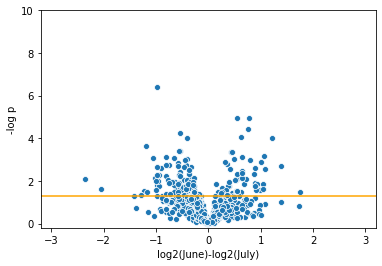

In [27]:
#graph volcano
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import log10
tstats_time['-log p'] = -log10(tstats_time['pvalue'])
tstats_BT['-log p'] = -log10(tstats_BT['pvalue'])

figure = sns.scatterplot(x='log2(June)-log2(July)',y='-log p',data=tstats_time)
plt.xlim(-3.2,3.2)
plt.ylim(-0.2,10)
print("Comparing Subject 1 B cells from June and July")
#plt.axvline(1, color ='orange')
#plt.axvline(-1, color ='orange')
plt.axhline(-log10(.05), color ='orange')
#plt.show()

plt.savefig("data/figure4a_June-July.png", dpi=300, bbox_inches='tight')

Comparing B and T cells from Subject 1 June


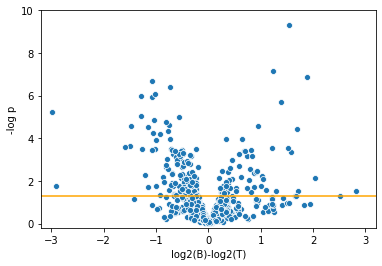

In [30]:
figure = sns.scatterplot(x='log2(B)-log2(T)',y='-log p',data=tstats_BT)
plt.xlim(-3.2,3.2)
plt.ylim(-0.2,10)
print("Comparing B and T cells from Subject 1 June")
#plt.axvline(1, color ='orange')
#plt.axvline(-1, color ='orange')
plt.axhline(-log10(.05), color ='orange')
#plt.show()
plt.savefig("data/figure4b_B-T.png", dpi=300, bbox_inches='tight')

### Differentially expressed proteins

Next we will identify the altered proteins.

In [11]:
altered_time = tstats_time .apply(data_utils.is_altered, axis=1, cell_types=types, 
                           change_factor=False, change_col= 'log2(June)-log2(July)').dropna()
altered_BT = tstats_BT.apply(data_utils.is_altered, axis=1, cell_types=types,
                           change_factor=False, change_col= 'log2(B)-log2(T)').dropna()

Recall that this dataset is restricted to those expressed in at least three of each cell type.

These are significantly altered (p<0.01) without restricting by the magnitude of change:

In [12]:
altered_time.value_counts()

B_cells_072920    38
B_cells_062920    29
dtype: int64

In [13]:
altered_BT.value_counts()

B_cells_072920    71
B_cells_062920    34
dtype: int64

The next step is to identify those proteins by name. Here we get the protein names from the fasta file, which remain the same regardless of which software the data was quantified using.

In [14]:
protein_names = load_data.load_fasta()

In [15]:
import pandas as pd
protein_names_by_group={}
for ID in data_raw.index:
    if ';' in ID:
        ids = ID.split(';')
        names=''
        for i in ids:
            if i in protein_names.index:
                names=names + protein_names[i] + ';'
        names = names[:-1]
        protein_names_by_group[ID] = names
    else:
        if ID in protein_names.index:
            protein_names_by_group[ID]=protein_names[ID]
protein_names_by_group = pd.Series(list(protein_names_by_group.values()), index=protein_names_by_group.keys())

Here we add the names to the <code>tstats</code> dataframe, which contains the fold changes for each protein. Then we can list the proteins that are altered. Optionally, use <code> head()</code> to display the first few or <code>to_csv</code> to write out to a file. We now split up the proteins heightened in B cells from those heightened in T cells.

In [16]:
tstats_time['Name']=protein_names_by_group
tstats_time['GeneID'] = tstats_time.Name.apply(lambda n: str(n).split('_HUMAN')[0])

altered_proteins_time = tstats_time.loc[altered_time.index].sort_values('log2(June)-log2(July)',
                        ascending=False)[['pvalue','log2(June)-log2(July)','Name','GeneID']]
higher_in_June = altered_proteins_time.loc[altered_proteins_time['log2(June)-log2(July)'] >0]
higher_in_July = altered_proteins_time.loc[altered_proteins_time['log2(June)-log2(July)'] <0]

#To write out to a file, use:
#altered_proteins.to_csv('data/filename.tsv', sep='\t')

In [17]:
tstats_BT['Name']=protein_names_by_group
tstats_BT['GeneID'] = tstats_BT.Name.apply(lambda n: str(n).split('_HUMAN')[0])

altered_proteins_BT = tstats_BT.loc[altered_BT.index].sort_values('log2(B)-log2(T)',
                        ascending=False)[['pvalue','log2(B)-log2(T)','Name','GeneID']]
higher_in_B = altered_proteins_BT.loc[altered_proteins_BT['log2(B)-log2(T)'] >0]
higher_in_T = altered_proteins_BT.loc[altered_proteins_BT['log2(B)-log2(T)'] <0]

#To write out to a file, use:
#altered_proteins.to_csv('data/filename.tsv', sep='\t')

### Proteins Higher in B Cells in June:

In [18]:
higher_in_June.sort_values('log2(June)-log2(July)',ascending=True).head()

,pvalue,log2(June)-log2(July),Name,GeneID
Protein ID,,,,
P31146,0.001305,0.324453,COR1A_HUMAN Coronin-1A,COR1A
P27348,0.001568,0.361530,1433T_HUMAN 14-3-3 protein theta,1433T
Q03252,0.002709,0.422610,LMNB2_HUMAN Lamin-B2,LMNB2
Q5SSJ5,0.000423,0.431998,HP1B3_HUMAN Heterochromatin protein 1-binding ...,HP1B3
P22626,0.000418,0.449893,ROA2_HUMAN Heterogeneous nuclear ribonucleopro...,ROA2


### Proteins Higher in B Cells in July:

In [19]:
higher_in_July.sort_values('log2(June)-log2(July)',ascending=True).head()

,pvalue,log2(June)-log2(July),Name,GeneID
Protein ID,,,,
O14745,0.007763,-2.363303,NHRF1_HUMAN Na(+)/H(+) exchange regulatory cof...,NHRF1
P02775,0.000226,-1.192720,CXCL7_HUMAN Platelet basic protein,CXCL7
P07996,0.000876,-1.065799,TSP1_HUMAN Thrombospondin-1,TSP1
P69905,0.007538,-1.014425,HBA_HUMAN Hemoglobin subunit alpha,HBA
P54819,0.009845,-1.002048,"KAD2_HUMAN Adenylate kinase 2, mitochondrial",KAD2


### Proteins Higher in B than T Cells:

In [20]:
higher_in_B.sort_values('log2(B)-log2(T)',ascending=True).head()

,pvalue,log2(B)-log2(T),Name,GeneID
Protein ID,,,,
P20700,0.007490,0.200425,LMNB1_HUMAN Lamin-B1,LMNB1
Q14697,0.003333,0.258279,GANAB_HUMAN Neutral alpha-glucosidase AB,GANAB
P40925,0.000109,0.344500,"MDHC_HUMAN Malate dehydrogenase, cytoplasmic",MDHC
P15311,0.003943,0.374889,EZRI_HUMAN Ezrin,EZRI
P05141,0.008709,0.400351,ADT2_HUMAN ADP/ATP translocase 2,ADT2


### Proteins Higher in T than B Cells:

In [21]:
higher_in_T.sort_values('log2(B)-log2(T)',ascending=True).head()

,pvalue,log2(B)-log2(T),Name,GeneID
Protein ID,,,,
O14745,0.000218,-4.268568,NHRF1_HUMAN Na(+)/H(+) exchange regulatory cof...,NHRF1
P26447,0.000006,-2.997963,10A4_HUMAN Protein S100-A4,10A4
Q15149,0.000269,-1.593452,PLEC_HUMAN Plectin,PLEC
P12814,0.000239,-1.507178,ACTN1_HUMAN Alpha-actinin-1,ACTN1
P31949,0.000026,-1.474413,10AB_HUMAN Protein S100-A11,10AB
